The Student Performance Dataset contains 10,000 student records with various predictors, including Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, and Sample Question Papers Practiced. 
The target variable is the Performance Index, which represents each student's overall academic performance (ranging from 10 to 100). The dataset aims to explore the relationship between these predictors and the student's academic performance.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Archana\Desktop\test & train\Online solved project\Students Performance\Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### Checking for null and duplicates in Data

In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.duplicated().sum()

127

In [8]:
df.shape

(10000, 6)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(9873, 6)

### Visualizing the Data Distribution

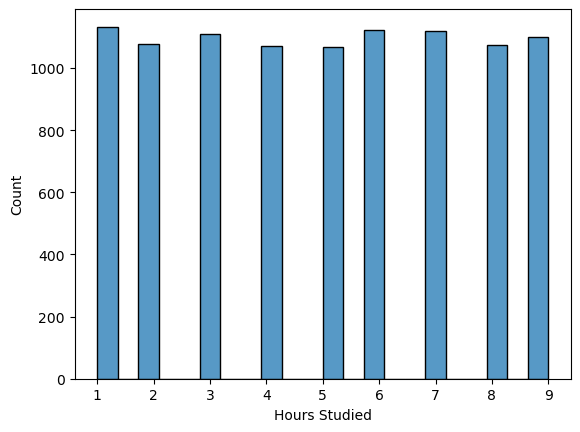

In [11]:
sns.histplot(data = df, x = 'Hours Studied')
plt.show()

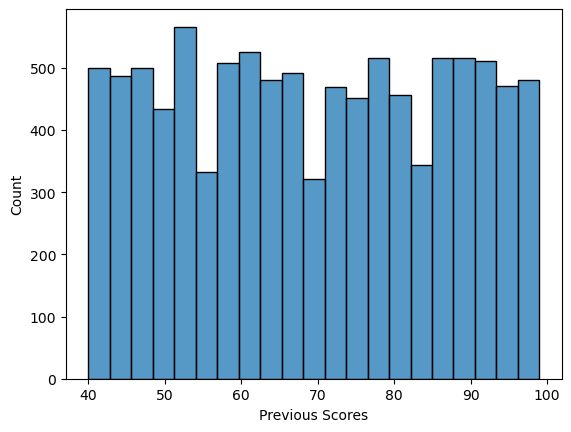

In [12]:
sns.histplot(data = df, x = 'Previous Scores')
plt.show()

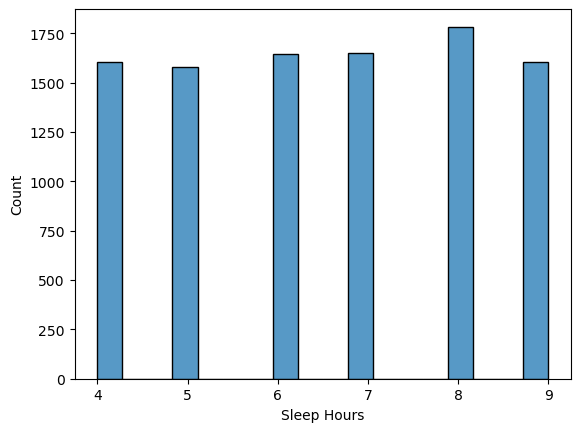

In [13]:
sns.histplot(data = df, x = 'Sleep Hours')
plt.show()

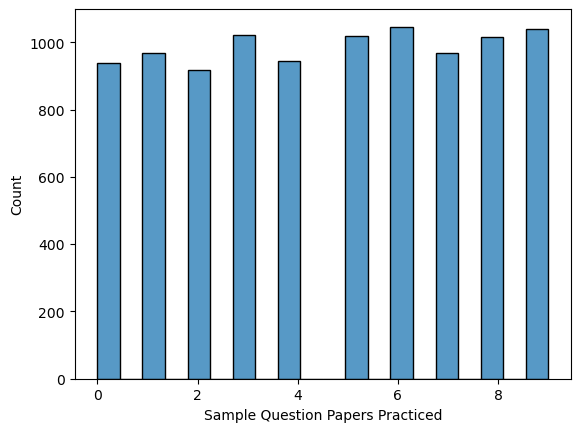

In [14]:
sns.histplot(data = df, x = 'Sample Question Papers Practiced')
plt.show()


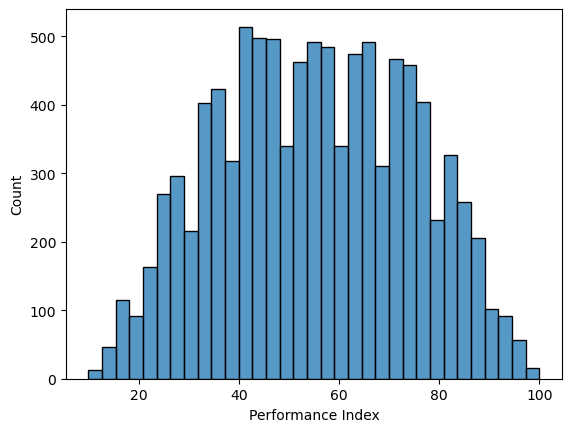

In [15]:
sns.histplot(data = df, x = 'Performance Index')
plt.show()


### Visualizing the Features Distribution

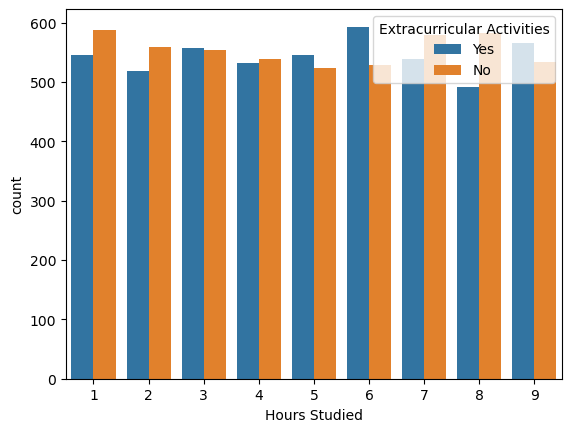

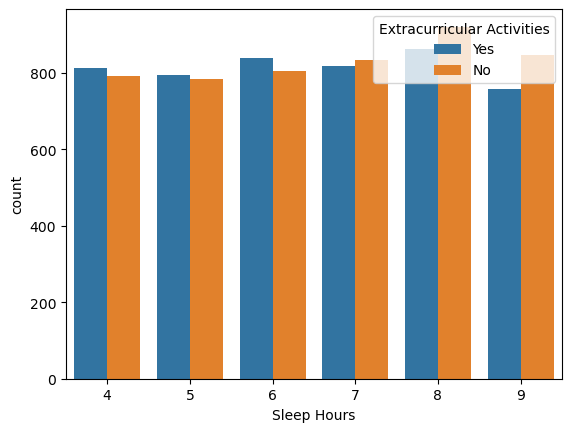

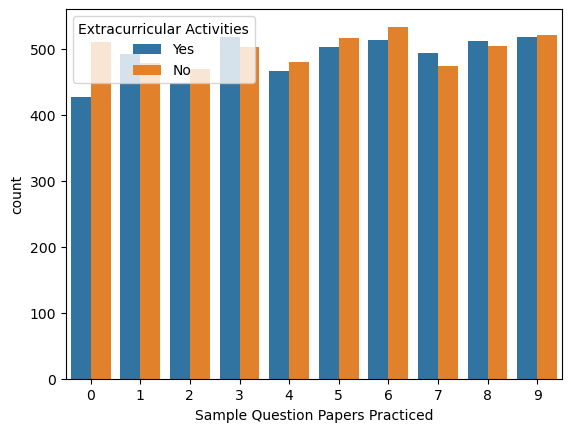

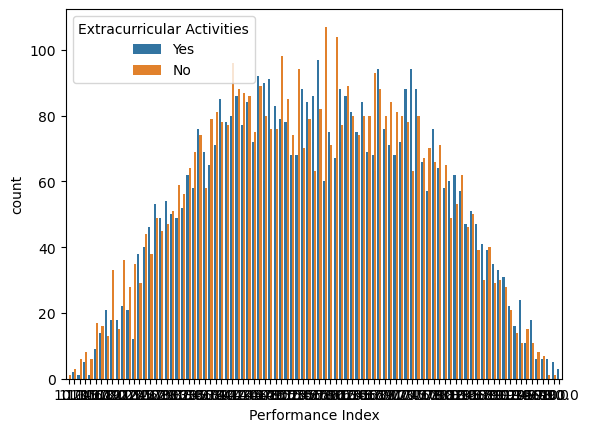

In [16]:
for i in ['Hours Studied', 'Sleep Hours','Sample Question Papers Practiced','Performance Index']:
    sns.countplot(x=i,hue='Extracurricular Activities',data=df)
    plt.show()

### Visualizing the Features Distribution

In [17]:
for i in []:
    sns.countplot(data=df, x=i,hue='Extracurricular Activities')
    plt.show()

In [18]:
df['Extracurricular Activities'].value_counts()

No     4986
Yes    4887
Name: Extracurricular Activities, dtype: int64

In [19]:
# encoding "Extracurricular Activities" Column
df.replace({'Extracurricular Activities':{'Yes':0,'No':1}},inplace=True)

In [20]:
df['Extracurricular Activities'].value_counts()

1    4986
0    4887
Name: Extracurricular Activities, dtype: int64

### Visualizing for all correlations

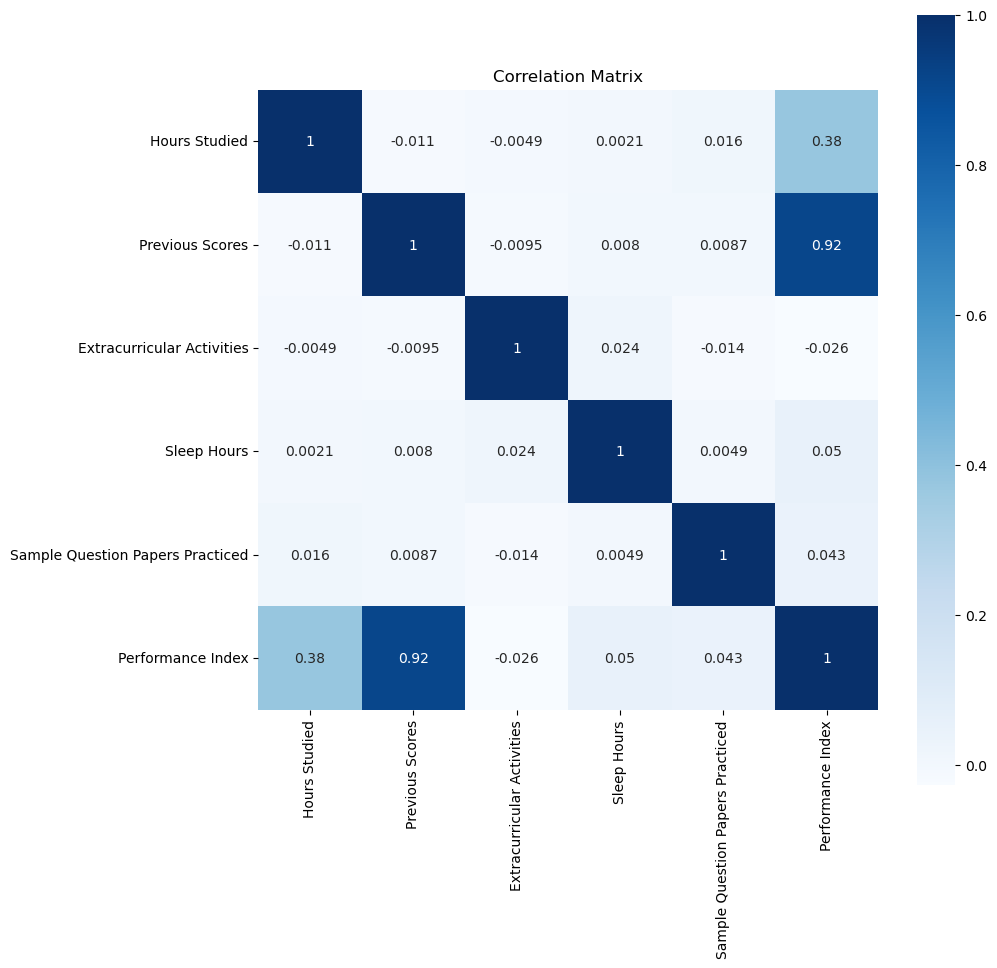

In [21]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### Separating Features and Target

In [22]:
X = df.drop("Performance Index", axis=1)
Y = df["Performance Index"]

In [23]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,0,9,1
1,4,82,1,4,2
2,8,51,0,7,2
3,5,52,0,5,2
4,7,75,1,8,5


In [24]:
Y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

#### Checking for Scaling

Text(0.5, 1.0, 'Before Scaling')

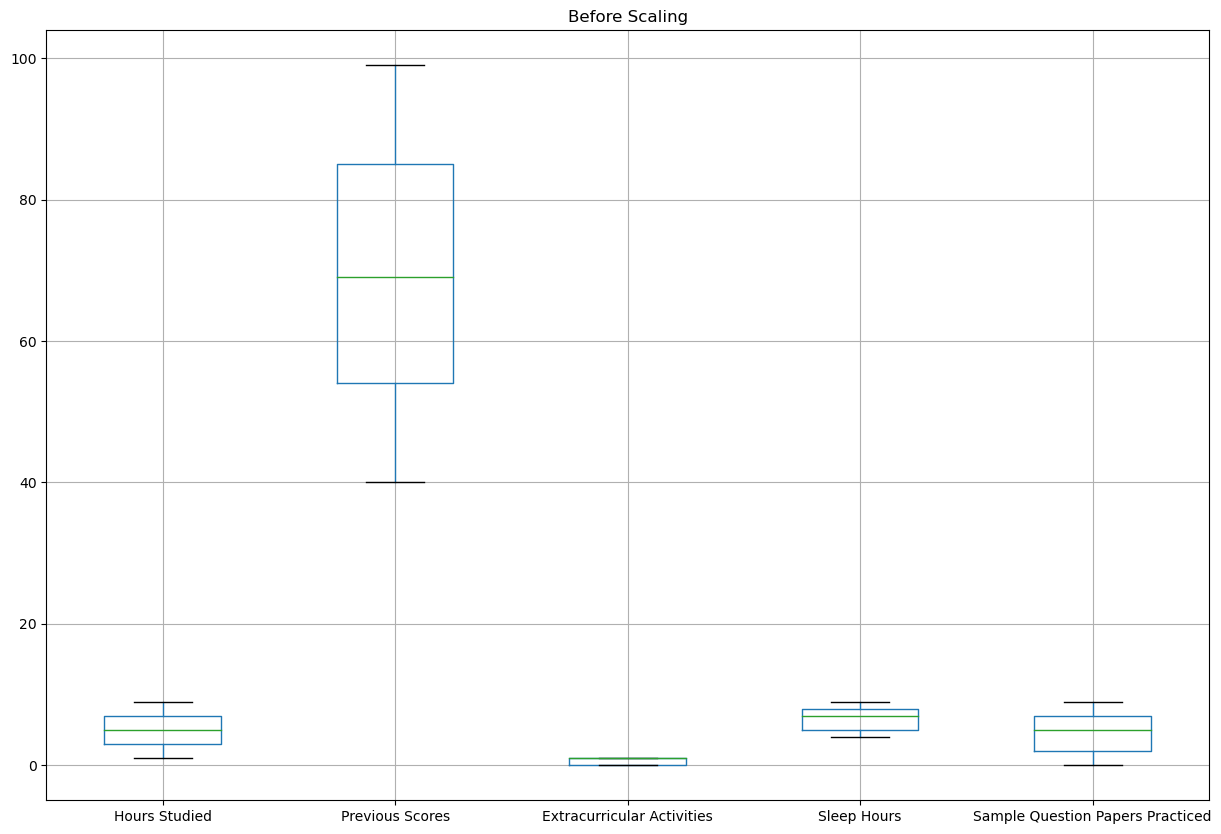

In [25]:
X.boxplot(figsize = (15,10))
plt.title("Before Scaling")

In [26]:
from sklearn.preprocessing import StandardScaler
scaling_col = ['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced']
scaler = StandardScaler()
scaler.fit(X[scaling_col])
X[scaling_col] = scaler.transform(X[scaling_col])

Text(0.5, 1.0, 'After Scaling')

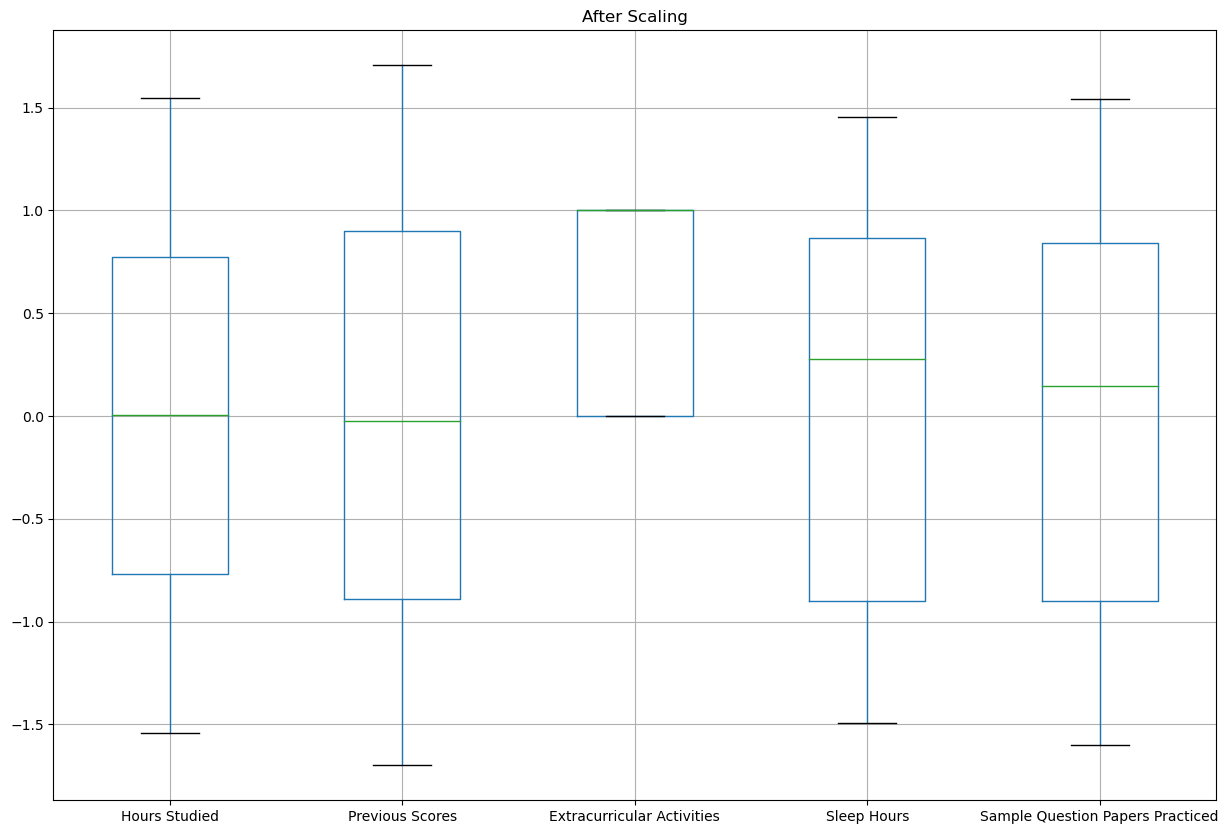

In [27]:
X.boxplot(figsize = (15,10))
plt.title("After Scaling")

### Spliting Data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 18)

### Model Evaluation (Linear Regression)

In [29]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [30]:
lr.fit(X_train,Y_train)

LinearRegression()

In [31]:
# prediction on Training data
y_pred_train = lr.predict(X_train)

In [32]:
# Model Evaluation
from sklearn import metrics

In [33]:
# R squared error
score_1 = metrics.r2_score(Y_train, y_pred_train)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, y_pred_train)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9886551658745846
Mean Absolute Error :  1.6231810149060155


#### This means that, on average, the MAE is 1.62 away from the predicted value.
#### R-squared of 0.98 shows a high level of correlation

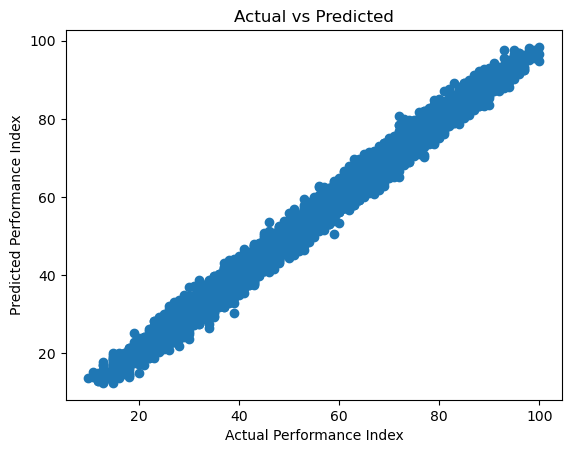

In [34]:
# Visualizing the actual Prices and predicted prices

plt.scatter(Y_train, y_pred_train)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted")
plt.show()

In [35]:
# prediction on Testing data
y_pred_test = lr.predict(X_test)

In [36]:
# R squared error
score_3 = metrics.r2_score(Y_test, y_pred_test)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, y_pred_test)

print("R squared error : ", score_3)
print('Mean Absolute Error : ', score_4)

R squared error :  0.9888216345999495
Mean Absolute Error :  1.6223418824226696


#### This means that, on average, the MAE is 1.62 away from the predicted value.
#### R-squared of 0.98 shows a high level of correlation

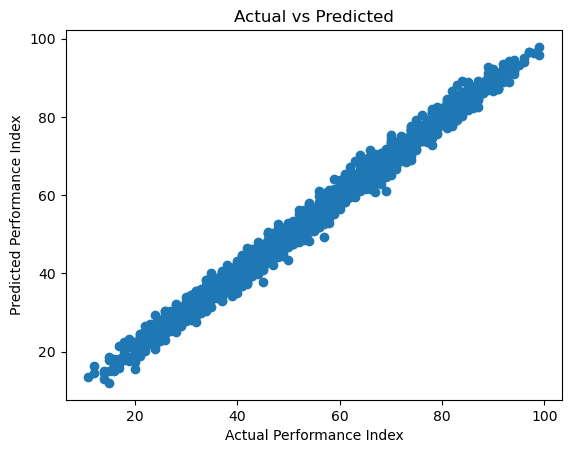

In [37]:
# Visualizing the actual Prices and predicted prices

plt.scatter(Y_test, y_pred_test)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted")
plt.show()